In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

## creating data

In [16]:
feature1=np.random.randint(100, size=1000)
feature2=np.random.randint(100, size=1000)
X1=np.array([feature1,feature2])
Y1=[]
for i in range(1000):
    x1=X1[0][i]
    x2=X1[1][i]
    if (x1-50)**2+(x2-50)**2-1000<0:    
        y=1
        
    else:
        y=0
    Y1.append(y)    
Y1=np.array(Y1)


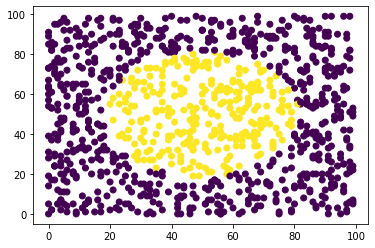

In [17]:
data=plt.scatter(X1[0],X1[1],c=Y1)

## train_test_split

In [2]:
X=X1[:,:8000]
X_test=X1[:,8000:10000]
Y=Y1[:8000]
Y_test=Y1[8000:10000]
X.shape,Y.shape,X_test.shape,Y_test.shape
Y=Y.reshape(1,8000)
Y.shape
Y_test=Y_test.reshape(1,2000)
X=np.array(X,dtype=np.float32)
Y=np.array(Y,dtype=np.float32)
X_test=np.array(X_test,dtype=np.float32)
Y_test=np.array(Y_test,dtype=np.float32)



NameError: name 'X1' is not defined

In [3]:
X.shape

NameError: name 'X' is not defined

## activation function

In [205]:
def sigmoid(x):
    y= 1/(1+np.exp(-x))
    
    return y
    

## derivative of sigmoid(for gradient descent)

In [206]:
def sigmoid_deriv(x):
    x = tf.Variable(x)
    e=np.exp(1)
    with tf.GradientTape() as tape:        
        y=1/(1+e**-x)
    
    
    dy_dx = tape.gradient(y, x)
    return dy_dx
    

## initialsing the parameters

In [207]:
def init_params(L1_neuron):                            
    W1=np.random.randn(L1_neuron,X.shape[0])
    B1=np.random.randn(L1_neuron,1)
    W2=np.random.randn(1,L1_neuron)
    B2=np.random.randn(1)
    return W1,B1,W2,B2
    

## forward propogation

In [208]:
def forward_prop(X,W1,B1,W2,B2):
    Z1=np.dot(W1,X)+B1
    
    A1= sigmoid(Z1)
    
    Z2=np.dot(W2,A1)+B2
    
    A2=sigmoid(Z2)
   
    return Z1,A1,Z2,A2

## backward popogation

In [209]:
def back_prop(Z1,A1,Z2,A2,W2,X,Y):
    m=Y.size
    dZ2=A2-Y
    dW2=1/m*dZ2.dot(A1.T)
    dB2=1/m*np.sum(dZ2,1)
    dZ1=np.dot(W2.T,dZ2)*sigmoid_deriv(Z1)
    dW1=1/m*np.dot(dZ1,X.T)    
    dB1=np.reshape(1/m*np.sum(dZ1,1),(W2.shape[1],1))    
    return dW1,dB1,dW2,dB2

In [210]:
def update_prams(W1,B1,W2,B2,dW2,dB2,dW1,dB1,alpha):
    W2=W2-alpha*dW2
    B2=B2-alpha*dB2
    W1=W1-alpha*dW1
    B1=B1-alpha*dB1    
    return W1,B1,W2,B2

In [211]:
def gradient_decent(X,Y,L1_neuron,iteration,alpha):    
    W1,B1,W2,B2=init_params(L1_neuron)
    
    for i in range(iteration):
        Z1,A1,Z2,A2=forward_prop(X,W1,B1,W2,B2)
        
        dW1,dB1,dW2,dB2=back_prop(Z1,A1,Z2,A2,W2,X,Y)
        
        W1,B1,W2,B2=update_prams(W1,B1,W2,B2,dW2,dB2,dW1,dB1,alpha)        
        if (i % (0.1*iteration)==0):
            print(np.sum(np.abs(Y-A2)))    ##value of total loss
        
    return W2,B2,W1,B1
        
    
        

In [212]:
def continue_gradient_decent(W1,B1,W2,B2,X,Y,L1_neuron,iteration,alpha):    
    
    
    for i in range(iteration):
        Z1,A1,Z2,A2=forward_prop(X,W1,B1,W2,B2)
        
        dW1,dB1,dW2,dB2=back_prop(Z1,A1,Z2,A2,W2,X,Y)
        
        W1,B1,W2,B2=update_prams(W1,B1,W2,B2,dW2,dB2,dW1,dB1,alpha)        
        if (i % (0.1*iteration)==0):
            print(np.sum(np.abs(Y-A2)))
        
    return W2,B2,W1,B1

In [213]:
def accuracy(W1,B1,W2,B2,X_test,Y_test):
    Z1=np.dot(W1,X_test)+B1
    
    A1= sigmoid(Z1)
    
    Z2=np.dot(W2,A1)+B2
    
    A2=sigmoid(Z2)
    accuracy=(np.sum(np.abs(Y_test-A2)))/Y_test.shape[1]
    accuracy = 1-accuracy
    return accuracy
    
    

In [99]:
def Y_pred(x1,x2):
    
    X=np.array([[x1],[x2]])
    Z1=np.dot(W1,X)+B1    
    A1= sigmoid(Z1)    
    Z2=np.dot(W2,A1)+B2    
    A2=sigmoid(Z2)
    return (A2)
   
    

In [129]:
W2,B2,W1,B1=gradient_decent(X,Y,20,10000,0.1)

2765.8113477985544
530.8508788679864
637.1082178709835
543.318782092859
520.0582268302469
560.8834099759546
555.6612621315392
564.3761973930959
529.6391558940289
637.0320412225749


In [140]:
W2,B2,W1,B1=continue_gradient_decent(W1,B1,W2,B2,X,Y,20,10000,0.01)

340.9588942411291
335.62932246739024
330.7276830492615
326.11110999029586
321.7792081429368
317.2205673705731
312.4684746806479
307.7033455782141
303.0106954436545
298.4170134360475


In [187]:
feature1=np.random.randint(10000, size=10000)
feature2=np.random.randint(10000, size=10000)
X1=np.array([feature1,feature2])
Y1=[]
for i in range(10000):
    x1=X1[0][i]
    x2=X1[1][i]
    if (0.2*x1)**2-x2<0:    
        y=1
        
    else:
        y=0
    Y1.append(y)    
Y1=np.array(Y1)


In [183]:
#X=X1[:,:8000]
X_test=X1[:,:]
#Y=Y1[:8000]
Y_test=Y1[0:]
X.shape,Y.shape,X_test.shape,Y_test.shape
#Y=Y.reshape(1,10000)
#Y.shape
Y_test=Y_test.reshape(1,10000)
#X=np.array(X,dtype=np.float32)
#Y=np.array(Y,dtype=np.float32)
X_test=np.array(X_test,dtype=np.float32)
Y_test=np.array(Y_test,dtype=np.float32)


In [184]:
accuracy(W1,B1,W2,B2,X_test,Y_test)

<ipython-input-90-b69fd1f41e6c>:2: RuntimeWarning: overflow encountered in exp
  y= 1/(1+np.exp(-x))


0.846600221413949

In [155]:
Y_pred(-5,-50)

array([[0.16264038]])

In [127]:
W1[1][1]

-0.4667808355295077